In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Northwind (1).xlsx - Customers.csv")
orders = pd.read_csv("Northwind (1).xlsx - Orders.csv")
order_details = pd.read_csv("Northwind (1).xlsx - Order Details.csv")
products = pd.read_csv("Northwind (1).xlsx - Products.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Northwind (1).xlsx - Customers.csv'

In [2]:
order_details["total_revenue"] = (order_details["UnitPrice"] * order_details["Quantity"])

In [3]:
df_merged = pd.merge(customers, orders, on='CustomerID')
df_merged = pd.merge(df_merged, order_details, on='OrderID')
df_merged = pd.merge(df_merged, products, on='ProductID', suffixes=('_sold', '_bought'))

In [4]:
df_merged['TotalRevenue'] = df_merged['UnitPrice_sold'] * df_merged['Quantity']

In [5]:
df_merged['TotalGrossProfit'] = ((df_merged['UnitPrice_sold'] - df_merged['UnitPrice_bought']) * df_merged['Quantity']) * (1 - df_merged['Discount'])

In [6]:
customer_analysis = df_merged.groupby(['CustomerID', 'CompanyName']).agg(
    TotalRevenue=('TotalRevenue', 'sum'),
    TotalGrossProfit=('TotalGrossProfit', 'sum'),
    OrderCount=('OrderID', 'nunique')
).reset_index()

In [84]:
top_5_customers = customer_analysis.sort_values(by='TotalRevenue', ascending=False).head(5)
top_5_customers

,CustomerID,CompanyName,TotalRevenue,TotalGrossProfit,OrderCount
60,QUICK,QUICK-Stop,117483.39,52930.37250,28
68,SAVEA,Save-a-lot Markets,115673.39,50010.30450,31
19,ERNSH,Ernst Handel,113236.68,49193.76175,30
35,HUNGO,Hungry Owl All-Night Grocers,57317.39,23668.08350,19
62,RATTC,Rattlesnake Canyon Grocery,52245.90,22439.05025,18


In [7]:
correlation = customer_analysis['OrderCount'].corr(customer_analysis['TotalGrossProfit'])

print(f"\nCorrelation between Order Count and Profit: {correlation:.2f}")


Correlation between Order Count and Profit: 0.89


Text(0.5, 1.0, 'Correlation between Orders and Profit')

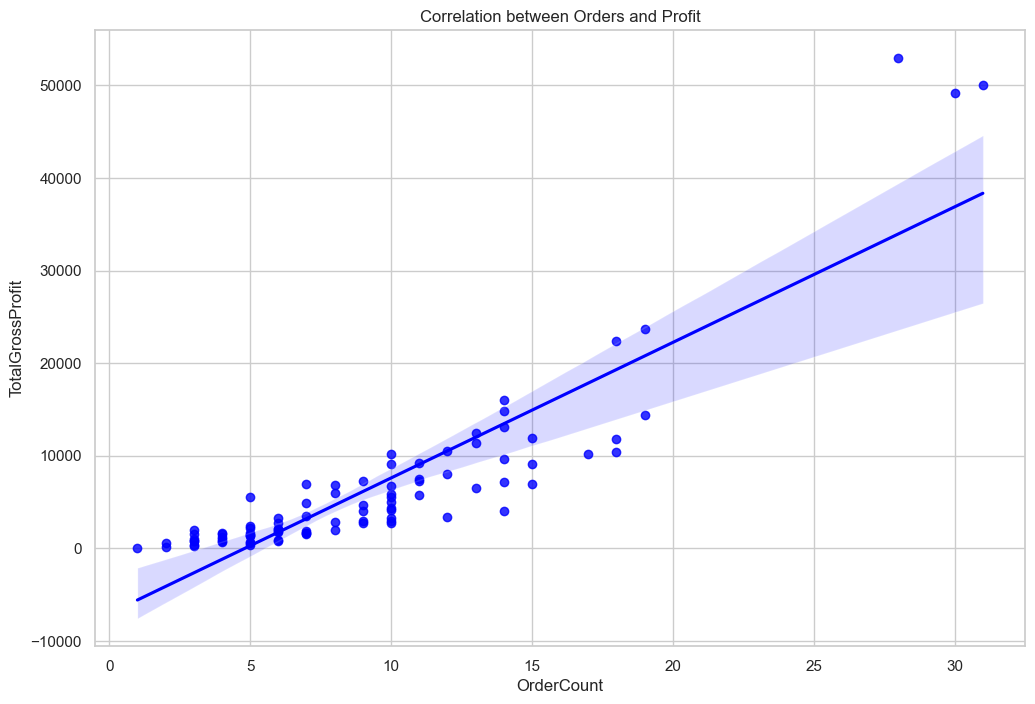

In [86]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.regplot(data=customer_analysis, x = 'OrderCount', y = 'TotalGrossProfit', color='blue')
plt.title('Correlation between Orders and Profit')

In [87]:
import plotly.express as px

country_profit = df_merged.groupby('Country')['TotalGrossProfit'].sum().reset_index()

fig = px.choropleth(
    data_frame=country_profit,
    locations="Country",
    locationmode="country names",
    color="TotalGrossProfit",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total Gross Profit by Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":40,"l":0,"b":0},
    paper_bgcolor='white',
    plot_bgcolor='white'
)


C:\Users\ygybl\AppData\Local\Temp\ipykernel_13620\784540304.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [88]:
country_profit


,Country,TotalGrossProfit
0,Argentina,3963.66000
1,Austria,59367.08175
2,Belgium,15355.14250
3,Brazil,49607.09700
4,Canada,22289.74000
5,Denmark,14246.53725
6,Finland,8496.45625
7,France,36737.16375
8,Germany,109037.08925
9,Ireland,23668.08350
